In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [20]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_dublin_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('dublin')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/dublin_{date}.csv',index=False)
get_listings_dublin_timeseries()

NameError: name 'bs' is not defined

In [21]:
# pull in detailed_listings
raw_df_dublin = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_dublin)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(dublin_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 6976 AirBnb listings.


In [22]:
dublin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2020-12.csv')
dublin_raw_df_12_12_2020.shape


(7894, 16)

In [23]:
# use magic commands 'cd' to change directory
# use glob to locate all files for dublin
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_dublin = glob.glob('dublin/**.csv')
files_dublin

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['dublin/Dublin_2021-11.csv',
 'dublin/Dublin_2021-10.csv',
 'dublin/Dublin_2021-04.csv',
 'dublin/Dublin_2021-06.csv',
 'dublin/Dublin_2021-07.csv',
 'dublin/Dublin_2021-03.csv',
 'dublin/Dublin_2021-02.csv',
 'dublin/Dublin_2021-01.csv',
 'dublin/Dublin_2021-09.csv',
 'dublin/Dublin_2021-08.csv',
 'dublin/Dublin_2020-12.csv']

In [24]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

dublin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(dublin_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(dublin_raw_df_12_12_2020['price'].mean(),2)}.")

dublin_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(dublin_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_1_9_2021['price'].mean(),2)}.")

dublin_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(dublin_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_2_8_2021['price'].mean(),2)}.")

dublin_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(dublin_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_3_4_2021['price'].mean(),2)}.")

dublin_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(dublin_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_4_9_2021['price'].mean(),2)}.")

#dublin_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(dublin_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_5_19_2021['price'].mean(),2)}.")

dublin_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(dublin_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_6_3_2021['price'].mean(),2)}.")

dublin_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(dublin_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_7_4_2021['price'].mean(),2)}.")

dublin_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(dublin_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_8_6_2021['price'].mean(),2)}.")

dublin_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(dublin_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_9_7_2021['price'].mean(),2)}.")

dublin_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(dublin_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_10_6_2021['price'].mean(),2)}.")

#dublin_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(dublin_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 7894 AirBnb listings; the avg price is €274.95.
The 1_9_2021 dataset contains 7831 AirBnb listings; the avg price is €275.96.
The 2_8_2021 dataset contains 7712 AirBnb listings; the avg price is €277.61.
The 3_4_2021 dataset contains 7598 AirBnb listings; the avg price is €281.69.
The 4_9_2021 dataset contains 7622 AirBnb listings; the avg price is €283.0.
The 6_3_2021 dataset contains 7607 AirBnb listings; the avg price is €272.6.
The 7_4_2021 dataset contains 7740 AirBnb listings; the avg price is €270.2.
The 8_6_2021 dataset contains 7554 AirBnb listings; the avg price is €275.06.
The 9_7_2021 dataset contains 7256 AirBnb listings; the avg price is €294.91.
The 10_6_2021 dataset contains 7068 AirBnb listings; the avg price is €301.72.


In [25]:
df_list_dublin = [dublin_raw_df_12_12_2020, dublin_raw_df_1_9_2021, dublin_raw_df_2_8_2021,
           dublin_raw_df_3_4_2021, dublin_raw_df_4_9_2021, dublin_raw_df_6_3_2021, dublin_raw_df_7_4_2021,
           dublin_raw_df_8_6_2021, dublin_raw_df_9_7_2021, dublin_raw_df_10_6_2021]

dates_dublin = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_dublin = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_dublin = []

def airbnb_parse_dublin(df_list, files):
    for file in files_dublin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/dublin/dublin_{file}.csv")
        print(f"The {file} dublin dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_dublin(df_list, dates):
    for file in files_dublin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/dublin/dublin_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_dublin.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_dublin)

dublin_parse = airbnb_parse_dublin(df_list_dublin, files_dublin)


The 2020-12 dublin dataset contains 7894 AirBnb listings -- the avg price is €274.95.
The 2021-01 dublin dataset contains 7831 AirBnb listings -- the avg price is €275.96.
The 2021-02 dublin dataset contains 7712 AirBnb listings -- the avg price is €277.61.
The 2021-03 dublin dataset contains 7598 AirBnb listings -- the avg price is €281.69.
The 2021-04 dublin dataset contains 7622 AirBnb listings -- the avg price is €283.0.
The 2021-06 dublin dataset contains 7607 AirBnb listings -- the avg price is €272.6.
The 2021-07 dublin dataset contains 7740 AirBnb listings -- the avg price is €270.2.
The 2021-08 dublin dataset contains 7554 AirBnb listings -- the avg price is €275.06.
The 2021-09 dublin dataset contains 7256 AirBnb listings -- the avg price is €294.91.
The 2021-10 dublin dataset contains 7068 AirBnb listings -- the avg price is €301.72.


In [26]:
dublin_summary = airbnb_to_frame_dublin(df_list_dublin, files_dublin)
dublin_summary['Date of scrape'] = pd.to_datetime(dublin_summary['Date of scrape'])
dublin_summary['City'] = 'Dublin'

dfi.export(dublin_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/airbnb_dublin_summary.png")


In [27]:
master_df_dublin = pd.concat(df_list_dublin)
master_df_dublin_unique = master_df_dublin.drop_duplicates(subset='id')
master_df_dublin_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,1.91,3,0,NaN,NaN
1,68483,Unique Central Dublin River-view,339817,John,NaN,Dublin City,53.34501,-6.26552,Entire home/apt,92,3,103,2019-08-12,0.87,1,43,NaN,NaN
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.05,1,348,NaN,NaN
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,51,3,182,2020-03-09,1.56,3,114,NaN,NaN
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.95,3,0,NaN,NaN


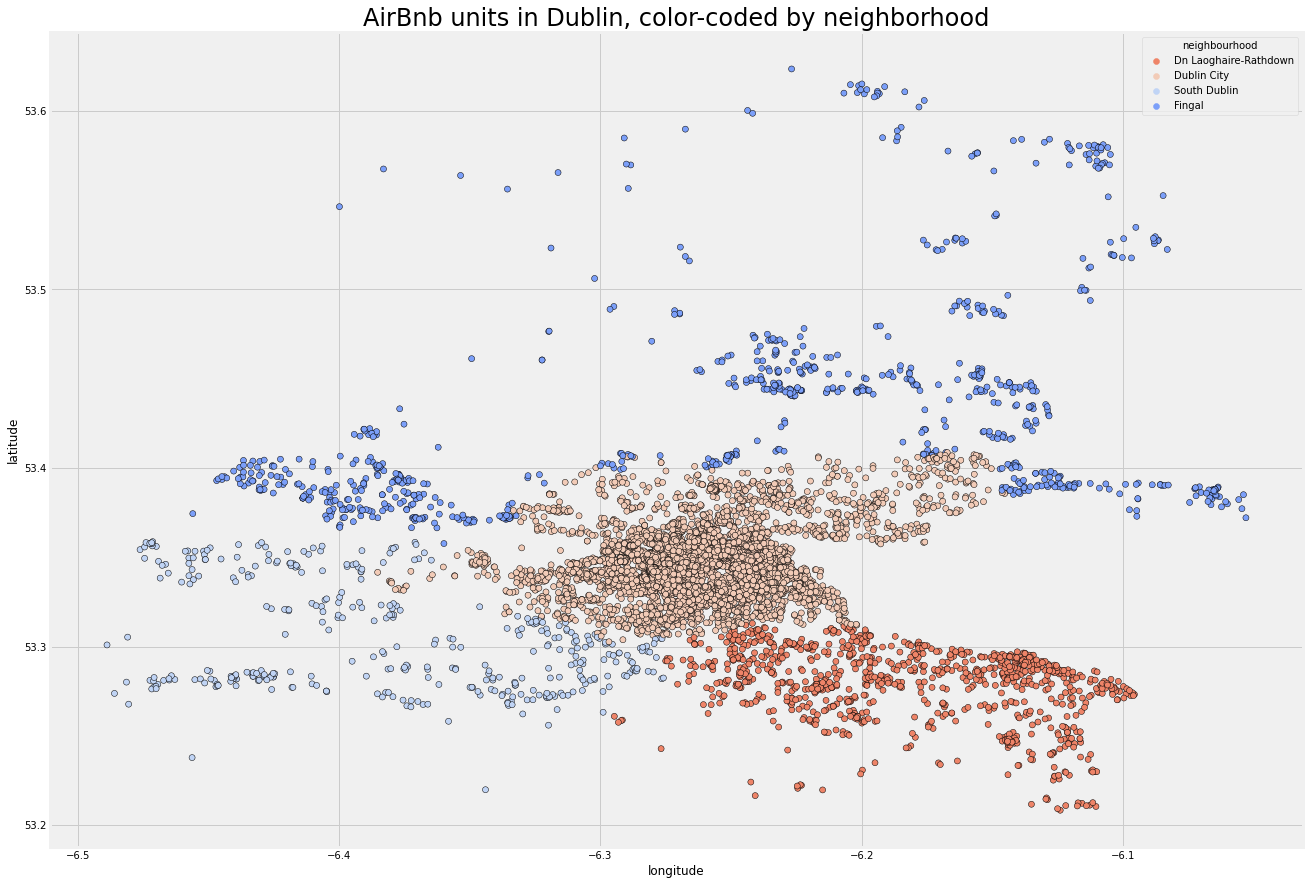

In [28]:
title = 'AirBnb units in Dublin, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_dublin_unique.longitude, master_df_dublin_unique.latitude, hue = master_df_dublin_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/airbnb_dublin_map.png')
plt.show()

## Add review data through a join

In [29]:
df_reviews = pd.concat([dublin_raw_df_10_6_2021,raw_df_dublin],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2.0    3213
4.0    1211
1.0    1066
6.0     453
3.0     383
5.0     296
Name: accommodates, dtype: int64

## Regression

In [30]:
#df_reviews_.columns

In [31]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [32]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -438.18710036229913
Coefficients:  [   3.13434358  -49.38688636 -110.46768208   -3.76871407   99.69292453
   28.05547438  217.00913756 -155.93079411   44.55290418]
LinearRegression()


In [33]:
y_pred2 = regr.predict(X_)

In [34]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


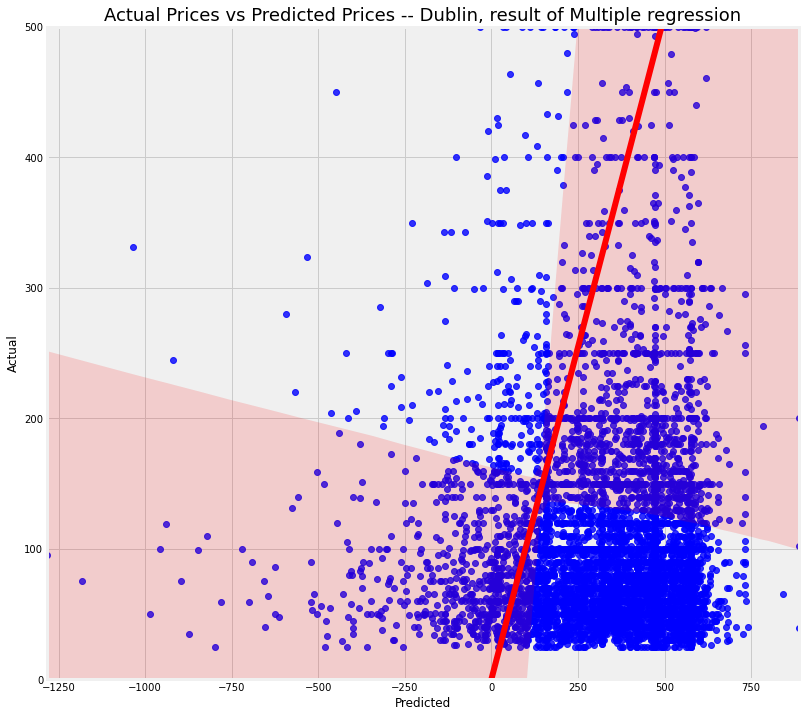

In [35]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Dublin, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/airbnb_dublin_multiple_regression.png')



In [36]:
df_result.shape

(6064, 3)

## The most mispriced [undervalued]

In [37]:
dublin_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
dublin_mispriced['%'] = (dublin_mispriced['Actual']/ dublin_mispriced['Predicted'] -1) *100
dublin_mispriced_perc = dublin_mispriced.sort_values(by=['%'], ascending=True)
dublin_mispriced_perc_plot = dublin_mispriced_perc.loc[(dublin_mispriced_perc['Predicted']>=1) & (dublin_mispriced_perc['Diff']>= 1)]
dublin_mispriced_perc_plot = dublin_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
dublin_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
3096,26,634.247078,608.247078,-95.900651
2987,29,679.598883,650.598883,-95.732777
3952,25,575.872279,550.872279,-95.658760
6183,25,575.125251,550.125251,-95.653121
5622,25,575.125251,550.125251,-95.653121


In [38]:

dublin_mispriced_1 = raw_df_dublin.loc[raw_df_dublin.id==827]
dublin_mispriced_2 = raw_df_dublin.loc[raw_df_dublin.id==748]
dublin_mispriced_3 = raw_df_dublin.loc[raw_df_dublin.index==1308]
dublin_mispriced_4 = raw_df_dublin.loc[raw_df_dublin.index==1748]
dublin_mispriced_5 = raw_df_dublin.loc[raw_df_dublin.index==894]

In [40]:
id_array = [3096, 2987, 3952, 6183, 5622]

dublin_mispriced_query = raw_df_dublin.query('index in @id_array')
dublin_mispriced_query = dublin_mispriced_query.rename({'index': 'id'}, axis=1)
dublin_mispriced_query.shape
#dublin_mispriced_query.head(1)

(5, 74)

In [41]:
#dublin_mispriced_neg = raw_df_dublin.loc[raw_df_dublin.index==4119]
dublin_mispriced_perc_1 = raw_df_dublin.loc[raw_df_dublin.id==3096]
dublin_mispriced_perc_2 = raw_df_dublin.loc[raw_df_dublin.id==2987]
dublin_mispriced_perc_3 = raw_df_dublin.loc[raw_df_dublin.id==3952]
dublin_mispriced_perc_4 = raw_df_dublin.loc[raw_df_dublin.id==6183]
dublin_mispriced_perc_5 = raw_df_dublin.loc[raw_df_dublin.id==5622]

In [42]:
dublin_mispriced = dublin_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
dublin_mispriced_1 = dublin_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

dublin_mispriced_1[:1]
dublin_mispriced_1[:2]
dublin_mispriced_1[:3]
dublin_mispriced_1[:4]
dublin_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
2987,21783902,$82.00,5.00,5.00,5.00,5.00,4.33,5.00,"Dublin, County Dublin, Ireland",https://www.airbnb.com/rooms/21783902
3096,22358111,$60.00,5.00,5.00,5.00,5.00,4.50,5.00,NaN,https://www.airbnb.com/rooms/22358111
3952,27022023,$85.00,4.88,4.96,4.88,4.96,4.69,4.81,"Dublin 4, County Dublin, Ireland",https://www.airbnb.com/rooms/27022023
5622,40247761,$249.00,5.00,5.00,5.00,5.00,5.00,5.00,"Dublin 4, County Dublin, Ireland",https://www.airbnb.com/rooms/40247761
6183,47070436,$35.00,5.00,5.00,5.00,5.00,5.00,5.00,"Drimnagh, County Dublin, Ireland",https://www.airbnb.com/rooms/47070436


In [43]:
dfi.export(dublin_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/airbnb_dublin_mispriced.png")



## The best score

In [44]:
dublin_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
dublin_high_value.head(6)

,Actual,Predicted,Diff
3749,39,886.986839,847.986839
4557,102,886.986839,784.986839
2110,200,886.986839,686.986839
523,65,842.433935,777.433935
2784,194,783.610646,589.610646
5481,40,740.678655,700.678655


In [45]:
id_array = [3749, 4557, 2110, 523, 2784]

dublin_best_score_query = raw_df_dublin.query('index in @id_array')
dublin_best_score_query = dublin_best_score_query.rename({'index': 'id'}, axis=1)
#dublin_best_score_query.head(1)

In [46]:
dublin_best_score = dublin_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
dublin_best_score_1 = dublin_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

dublin_best_score_1[:1]
dublin_best_score_1[:2]
dublin_best_score_1[:3]
dublin_best_score_1[:4]
dublin_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
523,6936928,$50.00,5.0,5.0,5.0,5.0,3.0,4.0,"Dublin, Ireland",https://www.airbnb.com/rooms/6936928
2110,17618483,$68.00,5.0,5.0,5.0,5.0,3.0,5.0,NaN,https://www.airbnb.com/rooms/17618483
2784,20696952,$36.00,5.0,5.0,5.0,5.0,3.5,4.5,NaN,https://www.airbnb.com/rooms/20696952
3749,25922637,$65.00,5.0,5.0,5.0,5.0,3.0,5.0,NaN,https://www.airbnb.com/rooms/25922637
4557,31501337,$100.00,5.0,5.0,5.0,5.0,3.0,5.0,NaN,https://www.airbnb.com/rooms/31501337


In [47]:
dfi.export(dublin_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/airbnb_dublin_best_score.png")


